In [1]:
import numpy as np
import matplotlib.pyplot as plt

from models import LSTM_Model
from train import Train

from utils import fisher_distance
from data_utils import create_loaders, simulate_data



train_window = 36
horizon = 12

input_dimension = 1
hidden_dimension = 40
batch_size = 256

device = 'cpu'

number_of_dataset = 10
merged_data = simulate_data(dataset_number = number_of_dataset, weekend_gain = 1.2, number_of_weeks = 1)

/home/ahmed/.conda/envs/pytorch_gpu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
train_loader, validation_loader = create_loaders(
    merged_data[0], train_window, horizon, batch_size)
model_0 = LSTM_Model(input_dimension, hidden_dimension, horizon)
train_object_0 = Train(model_0, train_loader, validation_loader)
train_object_0.train(num_epochs=50, verbose=True, verbose_every=1)

distances_list_0 = []
for i in range(0, len(merged_data)):
    print(f'computing distance {i}')
    t_loader, v_loader = create_loaders(merged_data[i], train_window, horizon, batch_size)
    distances_list_0.append(fisher_distance(train_object_0.model, validation_loader, v_loader, batch_size, batch_size))

-----starting training-----
epoch 01 train loss 1.70832 ------ validation loss 1.62992
epoch 02 train loss 1.59582 ------ validation loss 1.24646
epoch 03 train loss 1.46982 ------ validation loss 1.23714
epoch 04 train loss 1.29679 ------ validation loss 1.09745
epoch 05 train loss 1.00126 ------ validation loss 0.87961
epoch 06 train loss 0.81993 ------ validation loss 0.77137
epoch 07 train loss 0.80016 ------ validation loss 0.62986
epoch 08 train loss 0.67646 ------ validation loss 0.69955
epoch 09 train loss 0.62006 ------ validation loss 0.61589
epoch 10 train loss 0.60407 ------ validation loss 0.62131
epoch 11 train loss 0.59349 ------ validation loss 0.61940
epoch 12 train loss 0.57904 ------ validation loss 0.55049
epoch 13 train loss 0.61166 ------ validation loss 0.54944
epoch 14 train loss 0.57489 ------ validation loss 0.51984
epoch 15 train loss 0.55974 ------ validation loss 0.56630
epoch 16 train loss 0.54707 ------ validation loss 0.50906
epoch 17 train loss 0.50644 

In [ ]:
train_loader, validation_loader = create_loaders(
    merged_data[5], train_window, horizon, batch_size)
model_5 = LSTM_Model(input_dimension, hidden_dimension, horizon)
train_object_5 = Train(model_5, train_loader, validation_loader)
train_object_5.train(num_epochs=50, verbose=True, verbose_every=1)

distances_list_5 = []
for i in range(0, len(merged_data)):
    print(f'computing distance {i}')
    t_loader, v_loader = create_loaders(merged_data[i], train_window, horizon, batch_size)
    distances_list_5.append(fisher_distance(train_object_5.model, train_loader, t_loader, batch_size, batch_size))

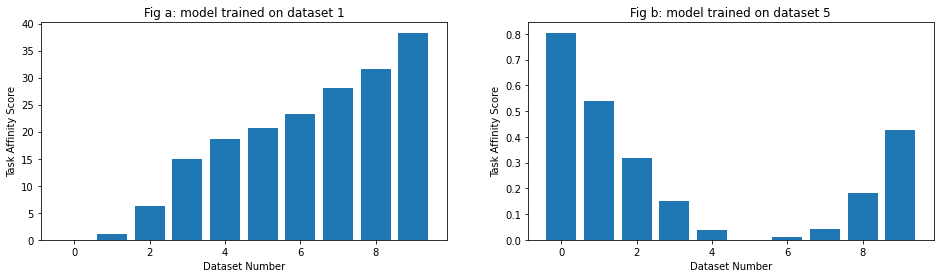

In [5]:
fig, axes = plt.subplots(1, 2,  figsize=(16, 4))

axes[0].bar(range(number_of_dataset), distances_list_0)
axes[0].set_xlabel('Dataset Number')
axes[0].set_ylabel('Task Affinity Score')
axes[0].set_title('Fig a: model trained on dataset 1')

axes[1].bar(range(number_of_dataset), distances_list_5)
axes[1].set_xlabel('Dataset Number')
axes[1].set_ylabel('Task Affinity Score')
axes[1].set_title('Fig b: model trained on dataset 5')

plt.show()